In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [41]:
data = pd.read_csv('./data/sample_music')
data.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,artist_genres,artist_pop,song_popularity
0,0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,...,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,Like a Rolling Stone,Bob Dylan,"['classic rock', 'country rock', 'folk', 'folk...",72,68
1,1,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,...,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,Smells Like Teen Spirit,Nirvana,"['grunge', 'permanent wave', 'rock']",82,0
2,2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,...,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,A Day In The Life - Remastered,The Beatles,"['beatlesque', 'british invasion', 'classic ro...",84,0
3,3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,...,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,Good Vibrations (Mono),The Beach Boys,"['baroque pop', 'classic rock', 'psychedelic r...",78,20
4,4,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,...,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,Johnny B Goode,Chuck Berry,"['classic rock', 'rock', 'rock-and-roll', 'roc...",75,0


In [42]:
data.drop(columns='Unnamed: 0',inplace=True)

In [43]:
#function to turn artist genres string to list
def genre_list(self):
    split = self.strip().split(',')
    clean = [x.strip(" [']") for x in split]
    return clean

In [44]:
# convert the df to list
data['artist_genres'] = data['artist_genres'].apply(lambda x: genre_list(x))

In [60]:
#finding all the genres in the data set
all_genres_counts = {}
for row in data.artist_genres:
    for x in row:
        if x not in all_genres_counts:
            all_genres_counts[x] = 1
        else:
            all_genres_counts[x] += 1
        
print(all_genres_counts)
    

{'classic rock': 301, 'country rock': 65, 'folk': 63, 'folk rock': 121, 'rock': 455, 'roots rock': 58, 'singer-songwriter': 71, 'grunge': 12, 'permanent wave': 185, 'beatlesque': 54, 'british invasion': 74, 'merseybeat': 47, 'psychedelic rock': 129, 'baroque pop': 28, 'sunshine pop': 17, 'rock-and-roll': 94, 'rockabilly': 65, 'classic soul': 66, 'jazz blues': 18, 'memphis soul': 22, 'soul': 127, 'southern soul': 30, 'adult standards': 83, 'brill building pop': 9, 'classic girl group': 14, 'funk': 72, 'indie r&b': 7, 'motown': 37, 'northern soul': 10, 'quiet storm': 43, 'pop': 55, 'r&b': 24, 'heartland rock': 17, 'mellow gold': 123, 'album rock': 102, 'art rock': 145, 'blues rock': 71, 'hard rock': 62, 'alternative rock': 122, 'madchester': 26, 'new wave': 79, 'post-punk': 40, 'uk post-punk': 21, 'soul blues': 14, 'atl hip hop': 14, 'dirty south rap': 6, 'hip hop': 68, 'old school atlanta hip hop': 3, 'pop rap': 16, 'rap': 70, 'southern hip hop': 10, 'punk': 47, 'dance pop': 65, 'indiet

In [46]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name,artist_genres,artist_pop,song_popularity
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,...,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,Like a Rolling Stone,Bob Dylan,"[classic rock, country rock, folk, folk rock, ...",72,68
1,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,...,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,Smells Like Teen Spirit,Nirvana,"[grunge, permanent wave, rock]",82,0
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,...,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,A Day In The Life - Remastered,The Beatles,"[beatlesque, british invasion, classic rock, m...",84,0
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,...,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,Good Vibrations (Mono),The Beach Boys,"[baroque pop, classic rock, psychedelic rock, ...",78,20
4,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,...,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,Johnny B Goode,Chuck Berry,"[classic rock, rock, rock-and-roll, rockabilly]",75,0


In [98]:
#combining genres with music feature data average into a new df
genre_features_input = {}
genre_features = {}
#list of features were looking for
features_input = ['danceability','energy','loudness','speechiness','acousticness','liveness','valence']


#loop through df
for i, r in data.iterrows():

    #loop through each genre
    for genre in r['artist_genres']:

        #create a dict for the genre if it isnt made
        if genre not in genre_features_input.keys():
            genre_features_input[genre] = []

            #start adding the features
            for feature in features_input:

                #create dict for features
                if feature not in genre_features.keys():
                    genre_features[feature] = []
                    genre_features[feature].append(r[feature])
                
            genre_features_input[genre].append(genre_features)
        #else add onto the generated genre key
        else:
            for genre_info in genre_features_input.values():
                for dicts in genre_info:
                    for key,v in dicts.items():
                        for feature in features_input:
                            if key == feature:
                                dicts[key].append(r[feature])
                    
                    
                
        genre_features = {}
        


In [99]:
genre_test = pd.DataFrame(genre_features_input)
genre_test.head()

,classic rock,country rock,folk,folk rock,rock,roots rock,singer-songwriter,grunge,permanent wave,beatlesque,...,makossa,vocal harmony group,ambient house,melodic rap,mississippi hip hop,indie punk,riot grrrl,bakersfield sound,bubblegrunge,country boogie
0,"{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.482, 0.485, 0.364, 0.364, ...","{'danceability': [0.485, 0.485, 0.364, 0.364, ...","{'danceability': [0.485, 0.485, 0.364, 0.364, ...","{'danceability': [0.364, 0.364, 0.364, 0.398, ...",...,"{'danceability': [0.831, 0.831, 0.504, 0.504, ...","{'danceability': [0.557, 0.682, 0.682, 0.682, ...","{'danceability': [0.682, 0.682, 0.682, 0.682, ...","{'danceability': [0.794, 0.794, 0.794, 0.794, ...","{'danceability': [0.794, 0.794, 0.794, 0.794, ...","{'danceability': [0.435, 0.435, 0.725, 0.483, ...","{'danceability': [0.435, 0.725, 0.483, 0.483, ...","{'danceability': [0.725, 0.725, 0.483, 0.483, ...","{'danceability': [0.483, 0.483, 0.483, 0.763, ...","{'danceability': [0.699, 0.699, 0.699, 0.747, ..."


In [100]:
#get the average of all the variables that was gathered from each artists songs associated with the genre
for genre_key in genre_features_input.values():
    for item in genre_key:
        for k,v in item.items():
            for x, y in all_genres_counts.items(): 
                # print(v[:10])
                new = sum(v)/y
                item[k] = new
            


In [101]:
genre_features_input['acid rock']

[{'danceability': 3084.692500000005,
  'energy': 3493.5413199999957,
  'loudness': -50325.03200000025,
  'speechiness': 363.15649999999806,
  'acousticness': 1519.269194709998,
  'liveness': 1073.999700000005,
  'valence': 3265.834600000036}]

In [102]:
genre_name = []
danceability = []
energy = []
loudness = []
speechiness = []
acousticness = []
liveness = []
valence = []
genres_counts = []

for key, value in genre_features_input.items():
    genre_name.append(key)
    for k, v in value[0].items():
        if k == 'danceability':
            danceability.append(v)
        elif k == 'energy':
            energy.append(v)
        elif k == 'loudness':
            loudness.append(v)
        elif k == 'speechiness':
            speechiness.append(v)
        elif k == 'acousticness':
            acousticness.append(v)
        elif k == 'liveness':
            liveness.append(v)
        else:
            valence.append(v)
for k, v in all_genres_counts.items():
        genres_counts.append(v)

In [103]:
test_dict = {'genre_name': genre_name,
'danceability': danceability,
'energy': energy,
'loudness': loudness,
'speechiness': speechiness,
'acousticness': acousticness,
'liveness': liveness,
'valence': valence,
'genre_counts': genres_counts}
genre_test = pd.DataFrame(test_dict)

In [104]:
genre_test

,genre_name,danceability,energy,loudness,speechiness,acousticness,liveness,valence,genre_counts
0,classic rock,3153.2155,3575.40332,-51562.430,372.2891,1560.643542,1094.5949,3347.117,301
1,country rock,3153.2155,3575.40332,-51562.430,372.2891,1560.643542,1094.5949,3347.117,65
2,folk,3153.2155,3575.40332,-51562.430,372.2891,1560.643542,1094.5949,3347.117,63
3,folk rock,3153.2155,3575.40332,-51562.430,372.2891,1560.643542,1094.5949,3347.117,121
4,rock,3153.2155,3575.40332,-51562.430,372.2891,1560.643542,1094.5949,3347.117,455
...,...,...,...,...,...,...,...,...,...
471,indie punk,39.0480,41.46800,-501.979,2.9712,17.380644,10.1655,41.119,1
472,riot grrrl,38.6130,40.52900,-498.134,2.8602,17.368444,10.1041,40.560,1
473,bakersfield sound,38.9030,40.24400,-500.572,2.8101,18.134244,10.1196,40.660,1
474,bubblegrunge,36.9700,38.24100,-482.513,2.6570,16.573634,9.8638,39.048,1


In [105]:
top10_genres = genre_test.nlargest(10, 'genre_counts')

fig = px.bar(top10_genres, x='genre_name', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')


fig.update_layout(
    yaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 0.2
    )
)
fig.show()

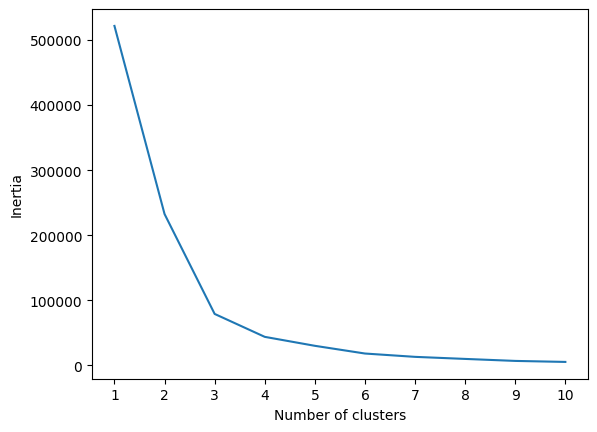

In [85]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(genre_test.drop(columns='genre_name'))
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [81]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, random_state=0))])
X = genre_test.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_test['cluster'] = cluster_pipeline.predict(X)

In [82]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_test['genre_name']
projection['cluster'] = genre_test['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 476 samples in 0.001s...
[t-SNE] Computed neighbors for 476 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 476 / 476
[t-SNE] Mean sigma: 0.242034
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.515869
[t-SNE] KL divergence after 1000 iterations: 0.159271
